# Modelo de inferencia para predecir xxxx
Borrador

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
#os.setcwd()
df1=pd.read_csv("credito_mlg_mcd.csv",encoding="latin-1")
coord1=pd.read_csv("coord_muni.csv")
pd.DataFrame(df1).head

/var/folders/4z/3y0y0k_506x0t2452xb26_tr0000gn/T/ipykernel_5129/3389061326.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  coord1=pd.read_csv("coord_muni.csv")


<bound method NDFrame.head of                  sector  cve_periodo nombre_publicacion  dl_estado  \
0        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
1        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
2        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
3        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
4        BANCA MÚLTIPLE       201912            CIBanco    YUCATAN   
...                 ...          ...                ...        ...   
1134244  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134245  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134246  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134247  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134248  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   

          dl_municipio  dat_ingreso_mensual_bruto  \
0            TANTOYUCA                    6392.00   
1        TIERRA BLANCA 

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134249 entries, 0 to 1134248
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   sector                          1134249 non-null  object 
 1   cve_periodo                     1134249 non-null  int64  
 2   nombre_publicacion              1134249 non-null  object 
 3   dl_estado                       1134248 non-null  object 
 4   dl_municipio                    1134248 non-null  object 
 5   dat_ingreso_mensual_bruto       1134249 non-null  float64
 6   dat_valor_vivienda_originacion  1134249 non-null  float64
 7   tipo_acreditado                 1134249 non-null  object 
 8   dl_tipo_comprobacion            1134249 non-null  object 
 9   dat_ai_edad_acred               1134249 non-null  int64  
 10  dl_genero                       1134249 non-null  object 
 11  numero de crédito               1134249 non-null  object 
 12  

Text(0, 0.5, 'valor de vivienda')

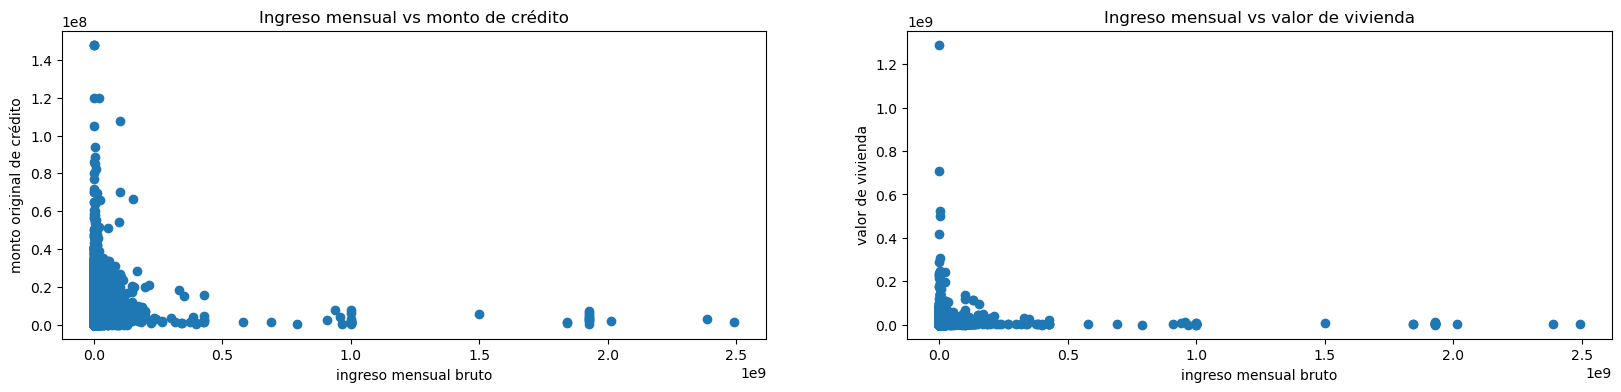

In [6]:
#
x=df1['dat_ingreso_mensual_bruto']
y1=df1['dat_monto_orig_cred']
y2=df1['dat_valor_vivienda_originacion']

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.title('Ingreso mensual vs monto de crédito')
plt.scatter(x,y1)
plt.xlabel('ingreso mensual bruto')
plt.ylabel('monto original de crédito')

plt.subplot(1, 2, 2)
plt.title('Ingreso mensual vs valor de vivienda')
plt.scatter(x,y2)
plt.xlabel('ingreso mensual bruto')
plt.ylabel('valor de vivienda')

In [7]:

plt.figure(figsize=(20, 4))
xv=df1['dl_segmento_vivienda']
plt.subplot(1, 2, 1)
plt.title('Ingreso mensual vs valor de vivienda')
plt.boxplot(xv,y1)
plt.xlabel('segmento de vivienda')
plt.ylabel('monto de crédito')

# xs=df1['sector']
# plt.subplot(1, 2, 2)
# plt.title('Ingreso mensual vs valor de vivienda')
# plt.boxplot(xv,y1)
# plt.xlabel('segmento de vivienda')
# plt.ylabel('monto de crédito')

plt.show()

In [ ]:
df1['cve_periodo'] = df1['cve_periodo'].astype(str)
df1['year'] = df1['cve_periodo'].str[:4].astype(int)
df1['month'] = df1['cve_periodo'].str[4:].astype(int)
df1['fecha'] = pd.to_datetime(df1[['year', 'month']].assign(day=1))
df1 = df1.drop(['cve_periodo', 'year', 'month'], axis=1)


In [ ]:
df1['tipo_acreditado'].unique()

array(['Asalariado Privado', 'Asalariado Público', 'No Asalariado'],
      dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134249 entries, 0 to 1134248
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   sector                          1134249 non-null  object        
 1   nombre_publicacion              1134249 non-null  object        
 2   dl_estado                       1134248 non-null  object        
 3   dl_municipio                    1134248 non-null  object        
 4   dat_ingreso_mensual_bruto       1134249 non-null  float64       
 5   dat_valor_vivienda_originacion  1134249 non-null  float64       
 6   tipo_acreditado                 1134249 non-null  object        
 7   dl_tipo_comprobacion            1134249 non-null  object        
 8   dat_ai_edad_acred               1134249 non-null  int64         
 9   dl_genero                       1134249 non-null  object        
 10  numero de crédito               1134249 no

In [ ]:
n1=df1.shape[0]
list1={'Y':df1['tasa_ponderada'],'t':df1['fecha'],"n":n1,
       "mun": df1['dl_municipio'], "edad":df1["dat_ai_edad_acred"],
       "tipo":df1["Tipo de Crédito"], "genero":df1["dl_genero"],
       "valor_viv":df1['dat_valor_vivienda_originacion'],"ingreso":df1['dat_ingreso_mensual_bruto'],
       "segmento_viv":df1["dl_segmento_vivienda"], "monto_orig":df1["dat_monto_orig_cred"], 
       "destino": df1["dl_destino_credito"], "acreditado": df1["tipo_acreditado"]
       }

In [ ]:
coord1.head

<bound method NDFrame.head of         CVE_ENT         NOM_ENT NOM_ABR  CVE_MUN                NOM_MUN  \
0             1  Aguascalientes    Ags.        1         Aguascalientes   
1             1  Aguascalientes    Ags.        1         Aguascalientes   
2             1  Aguascalientes    Ags.        1         Aguascalientes   
3             1  Aguascalientes    Ags.        1         Aguascalientes   
4             1  Aguascalientes    Ags.        1         Aguascalientes   
...         ...             ...     ...      ...                    ...   
304216       32       Zacatecas    Zac.       58  Santa María de la Paz   
304217       32       Zacatecas    Zac.       58  Santa María de la Paz   
304218       32       Zacatecas    Zac.       58  Santa María de la Paz   
304219       32       Zacatecas    Zac.       58  Santa María de la Paz   
304220       32       Zacatecas    Zac.       58  Santa María de la Paz   

        CVE_LOC                 NOM_LOC AMBITO    LAT_DEC     LON_DEC

In [2]:
df1["dl_municipio"]=df1["dl_municipio"].str.lower()
coord2=coord1[["NOM_MUN","LAT_DEC","LON_DEC"]].rename(columns={"NOM_MUN":"dl_municipio","LAT_DEC":"latitud","LON_DEC":"longitud"})
coord2["dl_municipio"]=coord2["dl_municipio"].str.lower()
coord3=pd.merge(df1["dl_municipio"],coord2,on="dl_municipio",how="left")

NameError: name 'df1' is not defined

TypeError: descriptor 'encode' for 'str' objects doesn't apply to a 'float' object

0              tantoyuca
1          tierra blanca
2          ursulo galvan
3                 xalapa
4              cansahcab
               ...      
1134244           juarez
1134245           juarez
1134246           juarez
1134247           juarez
1134248           juarez
Name: dl_municipio, Length: 1134249, dtype: object